<a href="https://colab.research.google.com/github/Thefifthperson/Neural-Networks/blob/main/SineCosineModelPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
#Sine Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [201]:
#generate some sample data
x_train = np.linspace (0, 5*np.pi/2, 1000) #input values
y_train = np.sin (x_train) #corresponding sine values
z_train = np.cos (x_train) #corresponding cosine values


In [202]:
#Define the Sine model architecture
sinmodel = tf.keras.Sequential ([
    tf.keras.layers.Dense(64, activation ="relu", input_shape=(1,)),
    tf.keras.layers.Dense(64, activation ="relu"),
    tf.keras.layers.Dense(1)
])

#Define the Cosine model architecture
cosmodel = tf.keras.Sequential ([
    tf.keras.layers.Dense(64, activation ="relu", input_shape=(1,)),
    tf.keras.layers.Dense(64, activation ="relu"),
    tf.keras.layers.Dense(1)
])

In [203]:
#Compile the sine model
sinmodel.compile(optimizer='adam', loss='MSE')
#sinmodel.compile(optimizer='adamax', loss='MSE')
#sinmodel.compile(optimizer='sgd', loss='MSE')
#sinmodel.compile(optimizer='nadam', loss='MSE')
#sinmodel.compile(optimizer='adam', loss='huber_loss')
#sinmodel.compile(optimizer='adam', loss='MAE')

In [211]:
#Compile the cosine model
#cosmodel.compile(optimizer='RMSprop', loss= 'MSE')
#cosmodel.compile(optimizer='adam', loss= 'MSE')
cosmodel.compile(optimizer='nadam', loss= 'MSE')
#cosmodel.compile(optimizer='adamax', loss= 'MSE')
#cosmodel.compile(optimizer='adam', loss= 'MAE')
#cosmodel.compile(optimizer='adam', loss= 'huber_loss')

In [205]:
#Train the sine model
sinmodel.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.5427
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4979
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4746
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4558
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4406
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4340
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4237
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4130
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3973
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3877
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3682
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3436
Epoch 13/100
32/32 [=================

In [212]:
#Train the cosine model
cosmodel.fit(x_train, z_train, epochs=100, batch_size=32)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.1173e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8833e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4183e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6053e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3402e-04
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5932e-04
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6202e-04
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0684e-04
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3058e-04
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.7518e-04
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 7.4436e-05
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 

In [207]:
#prediction using the trained sine model
x_test = np.array([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi, 9*np.pi/4, 5*np.pi/2]) #Test input values
sinpredictions = sinmodel.predict(x_test)
print(sinpredictions)

1/1 [==============================] - 0s 68ms/step
[[ 0.6954929 ]
 [ 0.99021715]
 [ 0.68149287]
 [-0.02467642]
 [-0.7264913 ]
 [-1.028997  ]
 [-0.6922108 ]
 [-0.06246257]
 [ 0.5672849 ]
 [ 1.1970329 ]]


In [213]:
#prediction using the trained cosine model
x_test = np.array([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi, 9*np.pi/4, 5*np.pi/2]) #Test input values
cospredictions = cosmodel.predict(x_test)
print(cospredictions)

1/1 [==============================] - 0s 89ms/step
[[ 0.7053206 ]
 [-0.00256537]
 [-0.7128365 ]
 [-1.0059948 ]
 [-0.7130153 ]
 [-0.00866134]
 [ 0.69767094]
 [ 0.99247277]
 [ 0.6895929 ]
 [-0.01690035]]


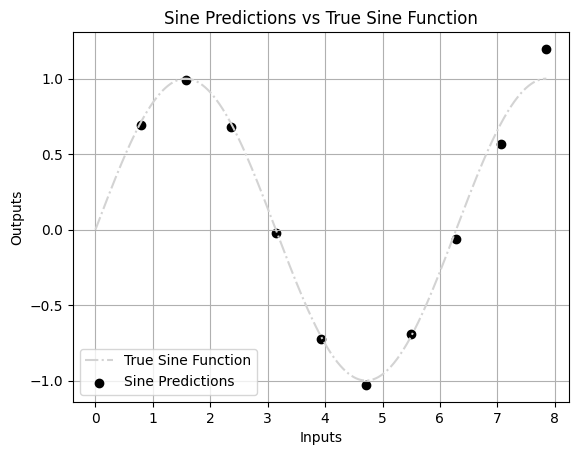

In [209]:
#Plot the true Sine function
plt.plot(x_train, y_train, label= 'True Sine Function', color='lightgrey', linestyle='dashdot')

#Plot the predicted value
plt.scatter(x_test, sinpredictions, label='Sine Predictions', color='black')

plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Sine Predictions vs True Sine Function')
plt.legend()
plt.grid(True)
plt.show()

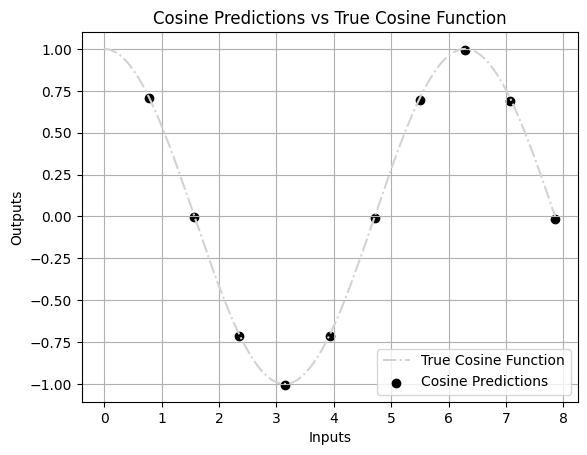

In [215]:
#Plot the true Cosine function
plt.plot(x_train, z_train, label= 'True Cosine Function', color='lightgrey', linestyle='dashdot')

#Plot the predicted value
plt.scatter(x_test, cospredictions, label='Cosine Predictions', color='black')

plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Cosine Predictions vs True Cosine Function')
plt.legend()
plt.grid(True)
plt.show()